# SPOTIFY MOST STREAM SONG


# Introduction


 Import libs 

In [26]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
import seaborn as sns
import plotly.express as px
import warnings
import seaborn as sns

# Data Preparation and Enrichment

### BIG CHECK

In [27]:
# Load the data
df=pd.read_csv('Updated4_Spotify_Streamed_Songs.csv')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url,country,music_genre
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,80,89,83,31,0,8,4,Not Found,6,5
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...,5,9
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...,9,7
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...,9,7
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...,5,9


DATA TYPES


In [28]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
cover_url               object
country                  int64
music_genre              int64
dtype: object

Check dupicates

In [29]:
df.duplicated().sum()

0

Count & Vizualisation

In [30]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,country,music_genre
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165,9.334732,1.195173
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888,1.852270,2.817953
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,10.000000,0.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,10.000000,0.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,10.000000,0.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,10.000000,11.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

### MISSING VALUES

In [32]:
print(df.isnull().sum()[df.isnull().sum() > 0])

in_shazam_charts    50
key                 95
dtype: int64


In [33]:
# Drop rows with any missing values
"""
This script performs data cleaning on a DataFrame by dropping rows and columns with any missing values.

Functions:
- Drop rows with any missing values.
- Drop columns with any missing values.

Variables:
- df_cleaned: DataFrame after dropping rows and columns with missing values.
"""
df_cleaned = df.dropna()

# Drop columns with any missing values
df_cleaned = df.dropna(axis=1)

### DATA CLEANER

Methods : Z-score, Interquartile Range (IQR), quantiles, Density-Based Spatial Clustering, Isolation Forest, Local Outlier Factor

In [34]:
from scipy import stats

# Calculate Z-scores for all numerical columns
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Identify outliers based on a Z-score threshold of 4
df_outliers = df[(z_scores > 4).any(axis=1) | (z_scores < -4).any(axis=1)]
print(f'Number of outliers detected: {df_outliers.shape[0]}')

Number of outliers detected: 89


#### Identification des valeurs aberrantes avec un seuil de Z-score 


In [35]:
# Remove rows with outliers based on Z-score
df_no_outliers = df[(z_scores < 4).all(axis=1) & (z_scores > -4).all(axis=1)]

Enfin, cette expression extrait toutes les lignes du DataFrame df qui contiennent au moins une valeur aberrante. Le DataFrame résultant (df_outliers) contient uniquement les lignes avec des valeurs anormales.

# Machine Learning

## Linear & Polynomial Regressions

Erreur quadratique moyenne de la régression linéaire: 7.715596978372896e+16
Score R2 de la régression linéaire: 0.6848111235622392
Erreur quadratique moyenne de la régression polynomiale: 5.778680489310189e+16
Score R2 de la régression polynomiale: 0.7639358541116297


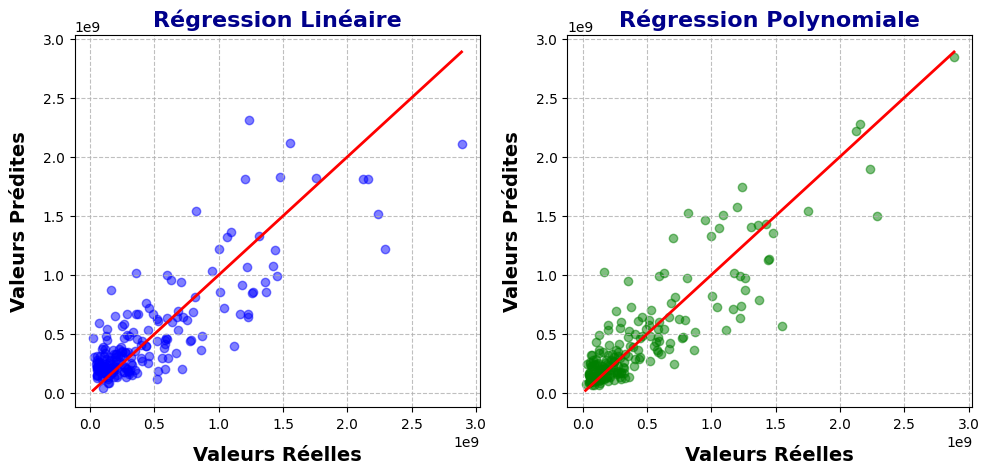

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Charger votre dataset (remplacer 'your_data.csv' par le chemin réel du fichier)
df = pd.read_csv('Updated4_Spotify_Streamed_Songs.csv')

# S'assurer que toutes les colonnes de caractéristiques sont numériques
X = df[['in_spotify_playlists', 'in_apple_playlists', 'released_year', 'in_spotify_charts','valence_%','acousticness_%', 'energy_%','bpm','released_day']].apply(pd.to_numeric, errors='coerce')


# Convertir la colonne 'streams' en numérique
y = pd.to_numeric(df['streams'], errors='coerce')

# Supprimer les lignes contenant des valeurs NaN dans X et y
# Créer un DataFrame combiné pour supprimer les NaN de manière synchrone
data = pd.concat([X, y], axis=1)
data = data.dropna()

# Séparer les données nettoyées en X et y
X = data[['in_spotify_playlists', 'in_apple_playlists', 'released_year', 'in_spotify_charts','valence_%','acousticness_%', 'energy_%','bpm','released_day', ]]
y = data['streams']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Régression polynomiale (degré=2 en exemple)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Modèle de régression polynomiale
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

# Évaluation des deux modèles
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Erreur quadratique moyenne de la régression linéaire:", mse_lin)
print("Score R2 de la régression linéaire:", r2_lin)
print("Erreur quadratique moyenne de la régression polynomiale:", mse_poly)
print("Score R2 de la régression polynomiale:", r2_poly)

# Visualisation
plt.figure(figsize=(10, 5))

# Tracer les résultats de la régression linéaire
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Régression Linéaire')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')

# Tracer les résultats de la régression polynomiale
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Régression Polynomiale')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')

plt.tight_layout()
plt.show()


Régression Linéaire - MSE: 80531504497888256.0000, R2: 0.6710
Régression Polynomiale (degré 2) - MSE: 69070864931164064.0000, R2: 0.7178


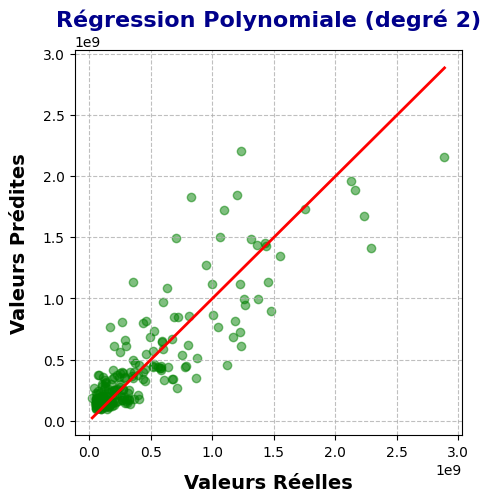

Régression Polynomiale (degré 3) - MSE: 75242942775643488.0000, R2: 0.6926


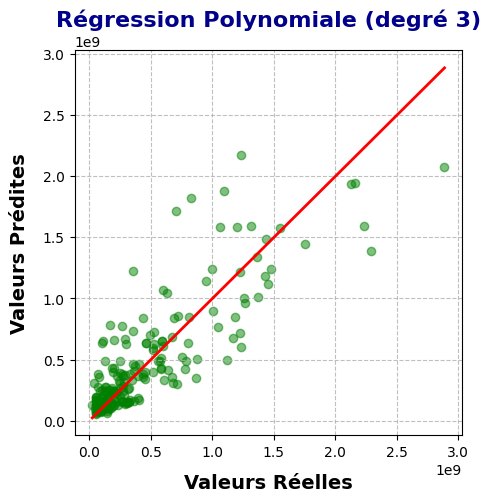

Régression Polynomiale (degré 4) - MSE: 76808948257180608.0000, R2: 0.6862


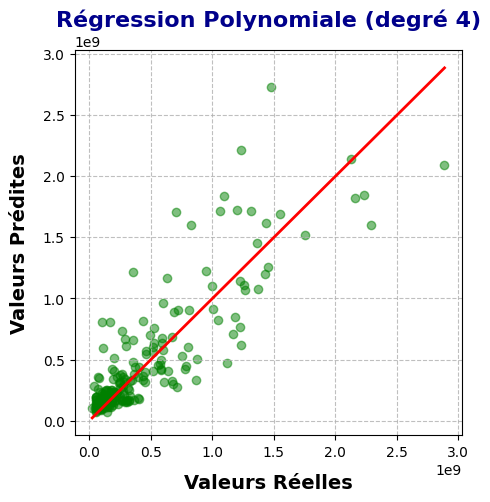

Régression Polynomiale (degré 5) - MSE: 65655921795913160.0000, R2: 0.7318


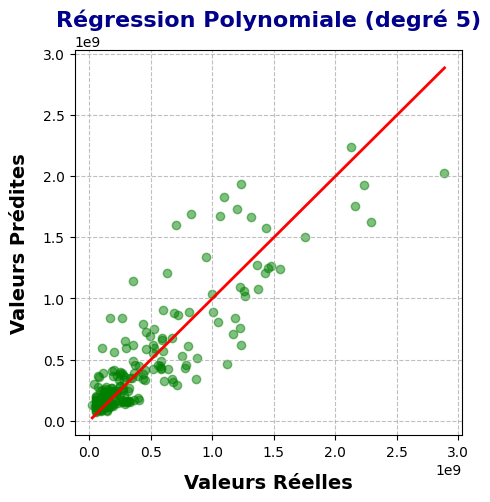

In [37]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Charger votre dataset (remplacer 'your_data.csv' par le chemin réel du fichier)
df = pd.read_csv('Updated4_Spotify_Streamed_Songs.csv')

# S'assurer que toutes les colonnes de caractéristiques sont numériques
X = df[['in_spotify_playlists', 'in_apple_playlists', 'released_year']].apply(pd.to_numeric, errors='coerce')

# Convertir la colonne 'streams' en numérique
y = pd.to_numeric(df['streams'], errors='coerce')

# Supprimer les lignes contenant des valeurs NaN dans X et y
data = pd.concat([X, y], axis=1).dropna()

# Séparer les données nettoyées en X et y
X = data[['in_spotify_playlists', 'in_apple_playlists', 'released_year']]
y = data['streams']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Régression linéaire de référence
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Régression Linéaire - MSE: {mse_lin:.4f}, R2: {r2_lin:.4f}")

# Tester plusieurs degrés de régression polynomiale
for degree in range(2, 6):  # Essayer des degrés de 2 à 5
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    # Ajuster le modèle de régression polynomiale
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    y_pred_poly = poly_reg.predict(X_test_poly)
    
    # Évaluer le modèle
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    
    print(f"Régression Polynomiale (degré {degree}) - MSE: {mse_poly:.4f}, R2: {r2_poly:.4f}")
    
    # Visualiser les résultats
    plt.figure(figsize=(5, 5))
    plt.scatter(y_test, y_pred_poly, color='green', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.title(f'Régression Polynomiale (degré {degree})')
    plt.xlabel('Valeurs Réelles')
    plt.ylabel('Valeurs Prédites')
    plt.show()


## Classifiers

### Correlation

Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'bpm',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%', 'country',
       'music_genre'],
      dtype='object')


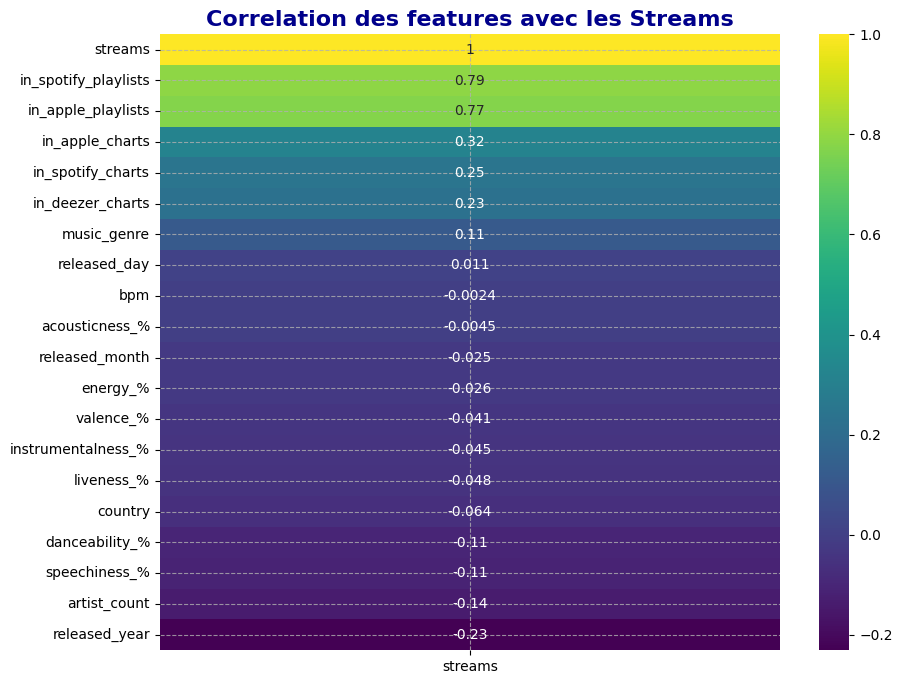

In [38]:
# Charger les données (supposons que le DataFrame est df)
df=pd.read_csv('Updated4_Spotify_Streamed_Songs.csv')

# Convertir la colonne 'streams' en type numérique
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Sélection des colonnes numériques pour l'analyse
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Check column names
print(numerical_df.columns)

# Ensure 'streams' column exists
if 'streams' not in numerical_df.columns:
    raise KeyError("'streams' column not found in the DataFrame. Please check the column name.")

# Corrélation avec la target 'streams'
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr()[['streams']].sort_values(by='streams', ascending=False), annot=True, cmap='viridis')
plt.title('Correlation des features avec les Streams')
plt.show()

### K-MEANS

### Random Forest

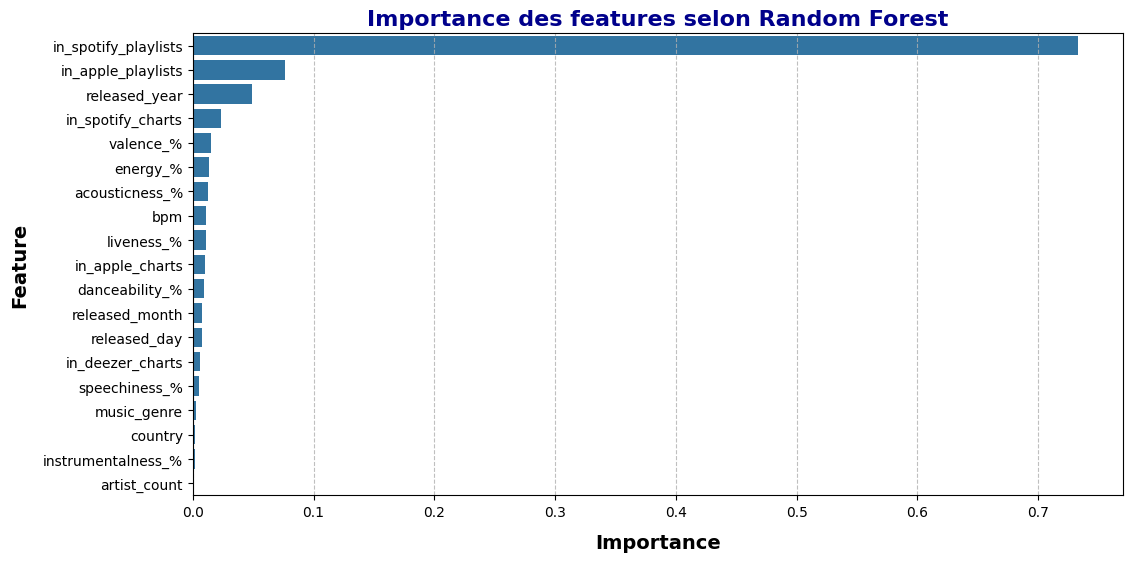

Les features les plus pertinentes selon RFE: Index(['released_year', 'in_spotify_playlists', 'in_spotify_charts',
       'in_apple_playlists', 'valence_%'],
      dtype='object')


In [39]:
# Préparer les données pour l'entraînement (target: 'streams')
X = numerical_df.drop(columns=['streams'])
y = numerical_df['streams']

# Drop rows with NaN values in the target variable
X = X[y.notna()]
y = y.dropna()

# Utilisation de Random Forest pour déterminer l'importance des features
model = RandomForestRegressor(random_state=42, n_estimators=200)
model.fit(X, y)

# Importance des features
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Afficher l'importance des features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importance des features selon Random Forest')
plt.show()

# Utilisation de la méthode RFE pour la sélection des features
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]

print(f'Les features les plus pertinentes selon RFE: {selected_features}')

### DECISION TREE

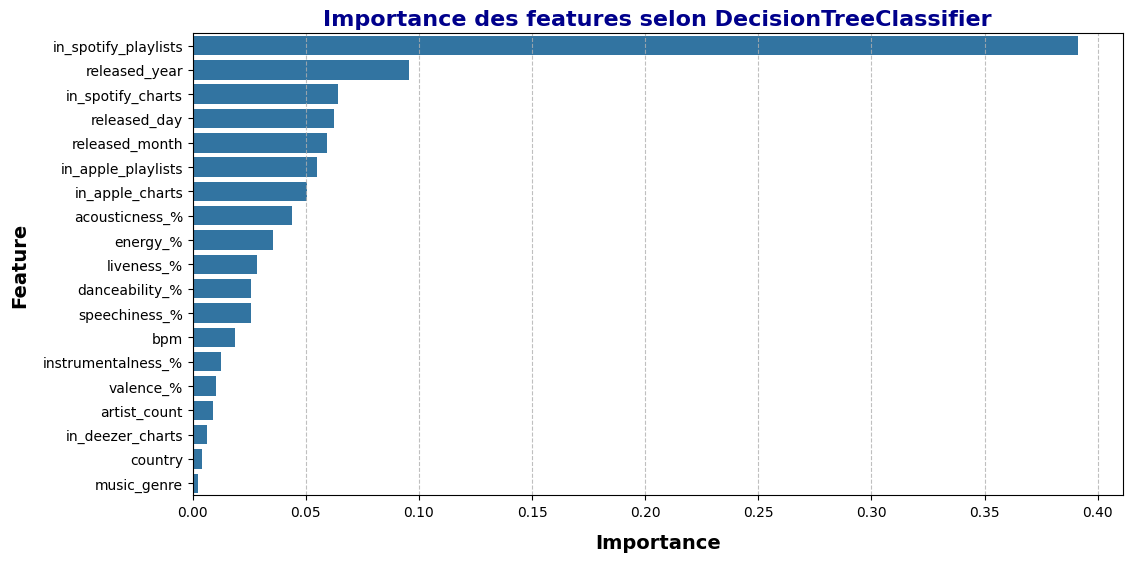

Les features les plus pertinentes selon RFE: Index(['released_year', 'released_month', 'in_spotify_playlists',
       'in_spotify_charts', 'in_apple_playlists'],
      dtype='object')


In [40]:
# Préparer les données pour l'entraînement (target: 'streams')
X = numerical_df.drop(columns=['streams'])
y = numerical_df['streams']

# Drop rows with NaN values in the target variable
X = X[y.notna()]
y = y.dropna()

# Convert continuous target variable to discrete classes
y_discrete = pd.qcut(y, q=4, labels=False)

# Utilisation de DecisionTreeClassifier pour déterminer l'importance des features
model = tree.DecisionTreeClassifier()
model.fit(X, y_discrete)

# Importance des features
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Afficher l'importance des features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importance des features selon DecisionTreeClassifier')
plt.show()

# Utilisation de la méthode RFE pour la sélection des features
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y_discrete)
selected_features = X.columns[rfe.support_]

print(f'Les features les plus pertinentes selon RFE: {selected_features}')

# DEEP LEARNING 

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
print(tf.__version__)

2.17.0


## Neural Network

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Charger les données
data = pd.read_csv('Updated2_Spotify_Streamed_Songs.csv')  # Remplacer par le chemin vers vos données

# Afficher les types de données des colonnes
print(data.dtypes)

# Identifier les colonnes non numériques
non_numeric_columns = data.select_dtypes(include=['object']).columns
# Ensure 'streams' column exists before conversion
if 'streams' in data.columns:
    data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
else:
    raise KeyError("'streams' column not found in the DataFrame. Please check the column name.")

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Définir l'architecture du modèle neuronal pour la régression
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Utiliser une activation linéaire pour la régression

# Compiler le modèle pour la régression
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Évaluer le modèle
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error: {mae:.2f}')

# Faire des prédictions
predictions = model.predict(X_test)

# Afficher l'erreur quadratique moyenne des prédictions
mse = mean_squared_error(y_test, predictions)
print(f'Erreur quadratique moyenne (MSE): {mse:.2f}')

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")



track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
cover_url               object
gender                   int64
country                  int64
music_genre              int64
dtype: object
Epoch 1/50


c:\Users\Camille\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 585325839680274432.0000 - mae: 516141760.0000 - val_loss: 652033622454304768.0000 - val_mae: 544073152.0000
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 572307106611331072.0000 - mae: 492969632.0000 - val_loss: 652033622454304768.0000 - val_mae: 544073152.0000
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 582614237847748608.0000 - mae: 518417568.0000 - val_loss: 652033553734828032.0000 - val_mae: 544073152.0000
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 587466245222170624.0000 - mae: 503496864.0000 - val_loss: 652033416295874560.0000 - val_mae: 544072960.0000
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 583025042879676416.0000 - mae: 495113408.0000 - val_loss: 652033072698490880.0000 - val_mae: 544072896.0000
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 610860897723744256.0000 - mae: 526307328.0000 - val_loss: 652032660381630464.0000 - val_mae: 544072704.0000
Epoch 7/50
61/6

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Charger les données
data = pd.read_csv('SpotifyStreamedSongs.csv')

# Convertir la colonne 'streams' en numérique
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

# Appliquer une transformation logarithmique sur 'streams'
data['streams'] = np.log1p(data['streams'])

# Encodage des colonnes non numériques en utilisant get_dummies
non_numeric_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=non_numeric_columns)

# Supprimer les lignes avec des valeurs manquantes dans la colonne 'streams'
data = data.dropna(subset=['streams'])

# Séparer les caractéristiques (X) et la cible (y)
X = data.drop(columns=['streams'])
y = data['streams']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Définir l'architecture du modèle neuronal avec régularisation L2 et EarlyStopping
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='linear'))

# Compiler le modèle
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Configurer le EarlyStopping pour éviter le surajustement
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraîner le modèle avec validation et EarlyStopping
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.3, callbacks=[early_stopping])

# Évaluer le modèle
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error: {mae:.2f}')

# Faire des prédictions
predictions = model.predict(X_test)

# Appliquer la transformation inverse pour revenir à l'échelle d'origine
y_test_exp = np.expm1(y_test)
predictions_exp = np.expm1(predictions)

# Calculer l'erreur quadratique moyenne sur l'échelle d'origine
mse = mean_squared_error(y_test_exp, predictions_exp)
print(f'Erreur quadratique moyenne (MSE) sur l\'échelle d\'origine: {mse:.2f}')

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")


Epoch 1/100


c:\Users\Camille\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 320.3374 - mae: 17.6591 - val_loss: 216.9954 - val_mae: 13.5225
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60.4724 - mae: 6.2503 - val_loss: 217.7566 - val_mae: 13.8743
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.7666 - mae: 2.3271 - val_loss: 219.7659 - val_mae: 14.0304
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9571 - mae: 0.9712 - val_loss: 220.7125 - val_mae: 14.0509
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9585 - mae: 0.4236 - val_loss: 222.5742 - val_mae: 14.1422
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5772 - mae: 0.3187 - val_loss: 225.1682 - val_mae: 14.2165
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4452 - mae: 0.2729 - val_loss: 227.7808 - val_mae: 14.3287
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3050 - mae: 0.2722 - val_loss: 231.4924 - val_mae: 14.4302
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

#### Prétraitement des Données :

##### Transformation Logarithmique de streams : 
Utilisation de np.log1p() pour réduire l'échelle de la variable cible streams. Cela a été fait pour stabiliser les grandes valeurs et éviter des problèmes de convergence pendant l'entraînement.
Transformation Inverse : Après la prédiction, application de np.expm1() pour revenir à l'échelle d'origine des prédictions.

##### Encodage des Variables Catégorielles :
Utilisation de pd.get_dummies() pour convertir les colonnes de type object en variables numériques. Cela permet au modèle d'utiliser des caractéristiques initialement textuelles comme track_name et artist(s)_name.

##### Régularisation L2 :
Ajout de régularisation L2 dans les couches du réseau neuronal pour réduire le surajustement. Cela ajoute une pénalité sur les poids élevés, forçant le modèle à être moins complexe.

##### Normalisation des Données :
Normalisation des caractéristiques avec StandardScaler pour améliorer la stabilité numérique pendant l'entraînement et faciliter la convergence du modèle.

##### Simplification du Modèle :
Réduction du nombre de neurones et de couches dans le réseau pour rendre le modèle moins complexe et plus adapté à la taille des données.

##### EarlyStopping :
Utilisation de EarlyStopping pour arrêter l'entraînement lorsque la val_loss cesse de s'améliorer, limitant ainsi le surajustement. Cela a permis de préserver le meilleur modèle avant que les performances sur les données de validation ne se détériorent.

## Gradient Boosting Machines

### Raw Gradient Boosting Machines

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler


print(data[['streams']].head())

# Convert the 'streams' column to numeric values and drop rows with conversion errors
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data = data.dropna(subset=['streams'])

# Load the dataset
data = pd.read_csv('Updated4_Spotify_Streamed_Songs.csv')

# Ensure all feature columns are numeric
important_features = ['in_spotify_playlists', 'in_apple_playlists', 'released_year', 
                      'in_spotify_charts','valence_%','acousticness_%', 'energy_%','bpm','released_day',
                      'country', 'music_genre']

# Convert features to numeric, coerce errors to NaN
data[important_features] = data[important_features].apply(pd.to_numeric, errors='coerce')

# Convert the target variable 'streams' to numeric
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

# Drop rows with NaN values in either the features or target variable
data = data.dropna(subset=important_features + ['streams'])

X = data[important_features]
y = data['streams']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GBM model
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gbm.fit(X_train, y_train)

# Make predictions
y_pred = gbm.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


       streams
0  141381703.0
1  133716286.0
2  140003974.0
3  800840817.0
4  303236322.0
Mean Squared Error: 3.891146063188276e+16
R-squared: 0.8064084571207952


### Improved Gradient Boosting Machines

In [55]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('Updated4_Spotify_Streamed_Songs.csv')

# Convert the 'streams' column to numeric values and drop rows with conversion errors
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data = data.dropna(subset=['streams'])

# Define important features
important_features = ['in_spotify_playlists', 'in_apple_playlists', 'released_year', 
                      'in_spotify_charts', 'valence_%', 'acousticness_%', 'energy_%', 'bpm', 'released_day',
                      'country', 'music_genre']

# Convert features to numeric, coerce errors to NaN
data[important_features] = data[important_features].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in either the features or target variable
data = data.dropna(subset=important_features + ['streams'])

# Feature matrix and target vector
X = data[important_features]
y = data['streams']

# Apply log transformation to the target variable to handle large variations in values
y = np.log1p(y)  # log1p is used to avoid issues with zeros (it calculates log(1 + y))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gradient Boosting Regressor with default parameters
gbm = GradientBoostingRegressor(random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform Grid Search with Cross Validation to find the best parameters
grid_search = GridSearchCV(gbm, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator from the grid search
best_gbm = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Train the best model
best_gbm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_log = best_gbm.predict(X_test_scaled)

# Convert predictions back from log scale
y_pred = np.expm1(y_pred_log)  # This is the inverse of the log1p transformation

# Convert y_test back from log scale for evaluation
y_test_original = np.expm1(y_test)

# Evaluate the model
mse = mean_squared_error(y_test_original, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test_original, y_pred)
print(f"R-squared: {r2}")

Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}
Mean Squared Error: 4.6051074301307816e+16
R-squared: 0.8118773387403914


''

# OTHERS THINKS

### BPM distribution

In [46]:
import plotly.express as px

fig = px.histogram(df_no_outliers, 
                   x='bpm', 
                   title='Distribution of BPM',
                   color='released_year',
                   color_discrete_sequence=px.colors.qualitative.Plotly)

fig.show()

A REFAIRE 

In [47]:
# total_streams = 

fig = px.histogram(df_no_outliers, 
                   x='streams',
                   y='bpm', 
                   title='streamed songs by BPM',
                   color='released_year',
                   color_discrete_sequence=px.colors.qualitative.Plotly)

fig.show()

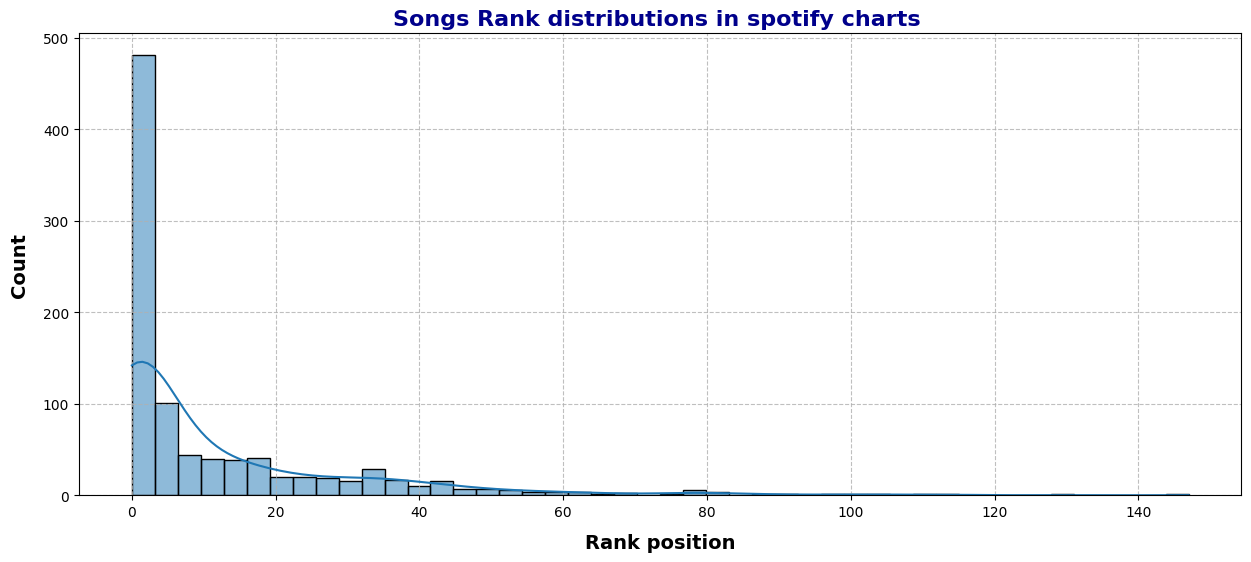

In [48]:
#Setting Gloabal Styles for the respective charts.

plt.rcParams['figure.figsize'] = [15, 6]
# Set title style
plt.rcParams['axes.titlesize'] = 16       # Title font size
plt.rcParams['axes.titleweight'] = 'bold' # Title font weight
plt.rcParams['axes.titlecolor'] = 'darkblue'  # Title color

# Set grid style
plt.rcParams['axes.grid'] = True          # Enable grid
plt.rcParams['grid.linestyle'] = '--'     # Grid line style (dashed)
plt.rcParams['grid.alpha'] = 0.8         # Grid transparency


# Set axis label styles
plt.rcParams['axes.labelsize'] = 14       # Axis label font size
plt.rcParams['axes.labelweight'] = 'bold' # Axis label weight
plt.rcParams['axes.labelpad'] = 10        # Padding between axis and label
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)

    sns.histplot(df['in_spotify_charts'], kde=True)
    plt.title('Songs Rank distributions in spotify charts ')
    plt.xlabel('Rank position')
    plt.show()



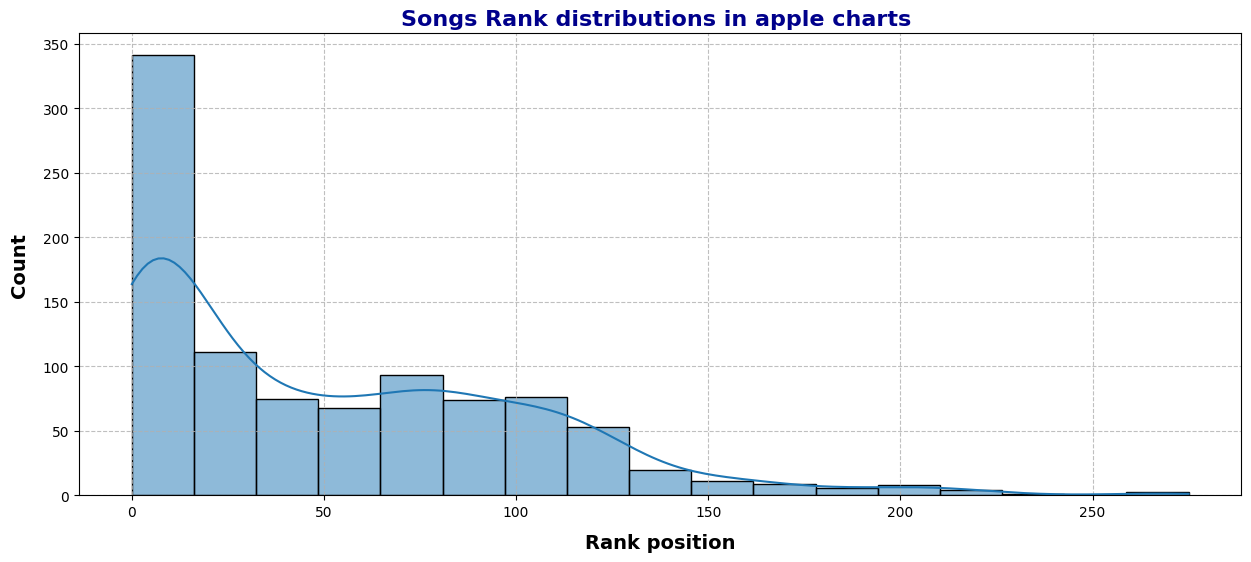

In [49]:
#Setting Gloabal Styles for the respective charts.

plt.rcParams['figure.figsize'] = [15, 6]
# Set title style
plt.rcParams['axes.titlesize'] = 16       # Title font size
plt.rcParams['axes.titleweight'] = 'bold' # Title font weight
plt.rcParams['axes.titlecolor'] = 'darkblue'  # Title color

# Set grid style
plt.rcParams['axes.grid'] = True          # Enable grid
plt.rcParams['grid.linestyle'] = '--'     # Grid line style (dashed)
plt.rcParams['grid.alpha'] = 0.8         # Grid transparency


# Set axis label styles
plt.rcParams['axes.labelsize'] = 14       # Axis label font size
plt.rcParams['axes.labelweight'] = 'bold' # Axis label weight
plt.rcParams['axes.labelpad'] = 10        # Padding between axis and label
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)

    sns.histplot(df['in_apple_charts'], kde=True)
    plt.title('Songs Rank distributions in apple charts ')
    plt.xlabel('Rank position')
    plt.show()